In [1]:
# Section C: Embeddings with Gensim - Word Embeddings

from gensim.downloader import load
model = load("glove-wiki-gigaword-50")

words = ["king", "queen", "diamond"]

for w in words:
    print(f"\n=== {w.upper()} ===")

    # First 10 vector values
    vector = model[w][:10]
    print("First 10 vector values:", vector)

    # Top 5 most similar words
    similar = model.most_similar(w, topn=5)
    print("Top 5 similar words:")
    for word, score in similar:
        print(f"  {word} — {score:.3f}")



=== KING ===
First 10 vector values: [ 0.50451   0.68607  -0.59517  -0.022801  0.60046  -0.13498  -0.08813
  0.47377  -0.61798  -0.31012 ]
Top 5 similar words:
  prince — 0.824
  queen — 0.784
  ii — 0.775
  emperor — 0.774
  son — 0.767

=== QUEEN ===
First 10 vector values: [ 0.37854   1.8233   -1.2648   -0.1043    0.35829   0.60029  -0.17538
  0.83767  -0.056798 -0.75795 ]
Top 5 similar words:
  princess — 0.852
  lady — 0.805
  elizabeth — 0.787
  king — 0.784
  prince — 0.782

=== DIAMOND ===
First 10 vector values: [-0.4958   0.78421 -0.606    1.3967   0.28888 -0.2058  -0.10745 -0.33252
  1.3608   0.15091]
Top 5 similar words:
  gold — 0.771
  diamonds — 0.766
  gem — 0.738
  silver — 0.721
  jewel — 0.710


In [2]:
import gensim.downloader as api
from gensim.similarities import SparseTermSimilarityMatrix, WordEmbeddingSimilarityIndex, SoftCosineSimilarity
from gensim import corpora

s1 = 'AI is transforming industries rapidly.'.split()
s2 = 'Machine learning models improve decision making.'.split()
s3 = 'Jewellery made of diamonds is highly valuable.'.split()
s4 = 'Gold ornaments are popular in many cultures.'.split()
s5 = 'Artificial intelligence enhances automation.'.split()

# Load pre-trained word vectors
word2vec_model = api.load('glove-wiki-gigaword-50')

documents = [s1, s2, s3, s4, s5]
dictionary = corpora.Dictionary(documents)
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Create the term similarity matrix
similarity_index = WordEmbeddingSimilarityIndex(word2vec_model)
similarity_matrix = SparseTermSimilarityMatrix(similarity_index, dictionary)

# Build the SoftCosineSimilarity index
soft_cosine_index = SoftCosineSimilarity(corpus, similarity_matrix, num_best=3)
query = dictionary.doc2bow(s1)
similarities = soft_cosine_index[query]
for i, sim in enumerate(similarities):
    print(f"Similarity between s1 and document {sim[0]+1}: {sim[1]:.4f}")

100%|██████████| 28/28 [00:00<00:00, 105.83it/s]

Similarity between s1 and document 1: 1.0000
Similarity between s1 and document 3: 0.4098
Similarity between s1 and document 4: 0.2770



C:\Users\Vidit's\Desktop\Vidit\iitm_parvartak\llm_and_embedding\venv\Lib\site-packages\gensim\similarities\termsim.py:382: RuntimeWarning: divide by zero encountered in divide
  normalized_corpus = np.multiply(corpus, 1.0 / corpus_norm)
C:\Users\Vidit's\Desktop\Vidit\iitm_parvartak\llm_and_embedding\venv\Lib\site-packages\gensim\similarities\termsim.py:382: RuntimeWarning: invalid value encountered in multiply
  normalized_corpus = np.multiply(corpus, 1.0 / corpus_norm)


In [3]:
import gensim.downloader as api
from gensim.similarities import SparseTermSimilarityMatrix, WordEmbeddingSimilarityIndex, SoftCosineSimilarity
from gensim import corpora

# Load GloVe vectors
model = api.load("glove-wiki-gigaword-50")

# Sentences
sentences = [
    "AI is transforming industries rapidly",
    "Machine learning models improve decision making",
    "Jewellery made of diamonds is highly valuable",
    "Gold ornaments are popular in many cultures",
    "Artificial intelligence enhances automation"
]

# Tokenize
tokenized = [s.lower().split() for s in sentences]

# Build dictionary
dictionary = corpora.Dictionary(tokenized)

# Convert to BoW
corpus = [dictionary.doc2bow(text) for text in tokenized]

# Create similarity index using embeddings
similarity_index = WordEmbeddingSimilarityIndex(model)

# Build term similarity matrix
similarity_matrix = SparseTermSimilarityMatrix(similarity_index, dictionary)

# Soft cosine similarity object
soft_cosine = SoftCosineSimilarity(corpus, similarity_matrix)

# Compute similarity matrix WITHOUT numpy
similarity_results = []

for bow_vec in corpus:
    sims = soft_cosine[bow_vec]       # Returns a list-like similarity vector
    similarity_results.append(list(sims))

# Print matrix
print("\nSoft Cosine Similarity Matrix:\n")
for row in similarity_results:
    print(row)


100%|██████████| 28/28 [00:00<00:00, 91.87it/s]


Soft Cosine Similarity Matrix:

[np.float32(1.0), np.float32(0.0), np.float32(0.3753303), np.float32(0.25372496), np.float32(0.0)]
[np.float32(0.0), np.float32(1.0), np.float32(0.3489339), np.float32(0.27377746), np.float32(0.0)]
[np.float32(0.5062701), np.float32(0.54177094), np.float32(1.0), np.float32(0.44007322), np.float32(0.0)]
[np.float32(0.19834636), np.float32(0.5544683), np.float32(0.38142088), np.float32(1.0), np.float32(0.0)]
[np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.0)]



Cosine Similarity Matrix (Avg Sentence Embeddings):

[np.float32(1.0), np.float32(0.8118), np.float32(0.721), np.float32(0.7164), np.float32(0.681)]
[np.float32(0.8118), np.float32(1.0), np.float32(0.7467), np.float32(0.7368), np.float32(0.7516)]
[np.float32(0.721), np.float32(0.7467), np.float32(1.0), np.float32(0.8628), np.float32(0.5944)]
[np.float32(0.7164), np.float32(0.7368), np.float32(0.8628), np.float32(1.0), np.float32(0.4499)]
[np.float32(0.681), np.float32(0.7516), np.float32(0.5944), np.float32(0.4499), np.float32(1.0)]


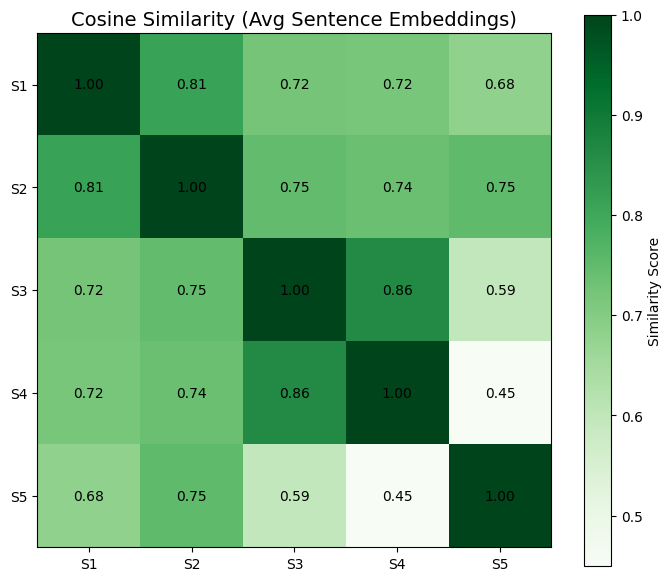

100%|██████████| 28/28 [00:00<00:00, 81.98it/s]
C:\Users\Vidit's\Desktop\Vidit\iitm_parvartak\llm_and_embedding\venv\Lib\site-packages\gensim\similarities\termsim.py:382: RuntimeWarning: divide by zero encountered in divide
  normalized_corpus = np.multiply(corpus, 1.0 / corpus_norm)
C:\Users\Vidit's\Desktop\Vidit\iitm_parvartak\llm_and_embedding\venv\Lib\site-packages\gensim\similarities\termsim.py:382: RuntimeWarning: invalid value encountered in multiply
  normalized_corpus = np.multiply(corpus, 1.0 / corpus_norm)



Soft Cosine Similarity Matrix (Fixed):

[np.float32(1.0), np.float32(0.0), np.float32(0.3753303), np.float32(0.25372496), np.float32(0.0)]
[np.float32(0.0), np.float32(1.0), np.float32(0.3489339), np.float32(0.27377746), np.float32(0.0)]
[np.float32(0.5062701), np.float32(0.54177094), np.float32(1.0), np.float32(0.44007322), np.float32(0.0)]
[np.float32(0.19834636), np.float32(0.5544683), np.float32(0.38142088), np.float32(1.0), np.float32(0.0)]
[np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(0.0), np.float32(1.0)]


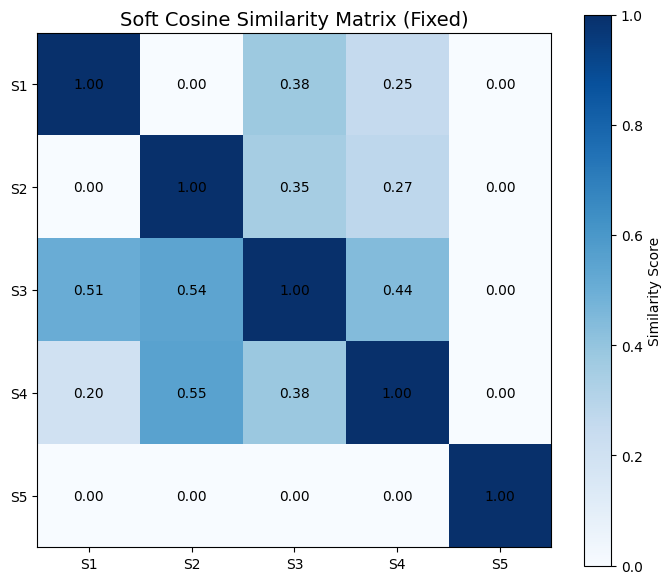

In [4]:
import gensim.downloader as api
from gensim.similarities import SparseTermSimilarityMatrix, WordEmbeddingSimilarityIndex, SoftCosineSimilarity
from gensim import corpora
import matplotlib.pyplot as plt

# -----------------------------------------------------------
# Load GloVe embeddings
# -----------------------------------------------------------
model = api.load("glove-wiki-gigaword-50")

# Sentences
sentences = [
    "AI is transforming industries rapidly",
    "Machine learning models improve decision making",
    "Jewellery made of diamonds is highly valuable",
    "Gold ornaments are popular in many cultures",
    "Artificial intelligence enhances automation"
]

tokenized = [s.lower().split() for s in sentences]

# ===========================================================
# PART 1 — AVERAGE WORD VECTOR SENTENCE EMBEDDINGS (REQUIRED)
# ===========================================================

def sentence_avg_vector(sentence, model):
    words = sentence.lower().split()
    vectors = [model[w] for w in words if w in model]

    if not vectors:
        return [0.0] * model.vector_size

    # Compute average manually (NO NumPy)
    avg_vec = [sum(col) / len(vectors) for col in zip(*vectors)]
    return avg_vec


# Compute sentence embeddings
avg_embeddings = [sentence_avg_vector(s, model) for s in sentences]

# Manual cosine similarity
def cosine_sim(v1, v2):
    dot = sum(a*b for a, b in zip(v1, v2))
    norm1 = sum(a*a for a in v1) ** 0.5
    norm2 = sum(b*b for b in v2) ** 0.5
    if norm1 == 0 or norm2 == 0:
        return 0.0
    return dot / (norm1 * norm2)


# Build similarity matrix
avg_sim_matrix = []
for i in range(len(avg_embeddings)):
    row = []
    for j in range(len(avg_embeddings)):
        row.append(round(cosine_sim(avg_embeddings[i], avg_embeddings[j]), 4))
    avg_sim_matrix.append(row)

# Print similarity matrix
print("\nCosine Similarity Matrix (Avg Sentence Embeddings):\n")
for row in avg_sim_matrix:
    print(row)

# -----------------------------
# Heatmap for Avg Embeddings
# -----------------------------
plt.figure(figsize=(7, 6))
plt.imshow(avg_sim_matrix, cmap='Greens', interpolation='nearest')
plt.title("Cosine Similarity (Avg Sentence Embeddings)", fontsize=14)
plt.colorbar(label="Similarity Score")

plt.xticks(range(len(sentences)), [f"S{i+1}" for i in range(len(sentences))])
plt.yticks(range(len(sentences)), [f"S{i+1}" for i in range(len(sentences))])

for i in range(len(avg_sim_matrix)):
    for j in range(len(avg_sim_matrix[i])):
        plt.text(j, i, f"{avg_sim_matrix[i][j]:.2f}",
                 ha='center', va='center', color='black')

plt.tight_layout()
plt.show()


# ===========================================================
# PART 2 — SOFT COSINE SIMILARITY (YOUR ORIGINAL CODE)
# ===========================================================

# Filter out words NOT in GloVe
filtered_tokenized = [
    [w for w in sentence if w in model]
    for sentence in tokenized
]

# If any sentence becomes empty, replace with ["empty"]
filtered_tokenized = [
    sentence if sentence else ["empty"]
    for sentence in filtered_tokenized
]

# Build dictionary again
dictionary = corpora.Dictionary(filtered_tokenized)

# Convert to BoW
corpus = [dictionary.doc2bow(text) for text in filtered_tokenized]

# Build term similarity matrix
similarity_index = WordEmbeddingSimilarityIndex(model)
similarity_matrix = SparseTermSimilarityMatrix(similarity_index, dictionary)

# Soft cosine similarity object (NO WARNINGS NOW)
soft_cosine = SoftCosineSimilarity(corpus, similarity_matrix)

# Compute similarity results
soft_sim_matrix = []
for bow_vec in corpus:
    sims = soft_cosine[bow_vec]
    soft_sim_matrix.append(list(sims))

# Print Soft Cosine Matrix
print("\nSoft Cosine Similarity Matrix (Fixed):\n")
for row in soft_sim_matrix:
    print(row)

# Heatmap
plt.figure(figsize=(7, 6))
plt.imshow(soft_sim_matrix, cmap='Blues', interpolation='nearest')
plt.title("Soft Cosine Similarity Matrix (Fixed)", fontsize=14)
plt.colorbar(label="Similarity Score")

plt.xticks(range(len(sentences)), [f"S{i+1}" for i in range(len(sentences))])
plt.yticks(range(len(sentences)), [f"S{i+1}" for i in range(len(sentences))])

for i in range(len(soft_sim_matrix)):
    for j in range(len(soft_sim_matrix[i])):
        plt.text(j, i, f"{soft_sim_matrix[i][j]:.2f}",
                 ha='center', va='center', color='black')

plt.tight_layout()
plt.show()

In [5]:
from transformers import pipeline

#model
# Load sentiment classifier
classifier = pipeline("sentiment-analysis")

# Custom input text
text = """The new product launch received impressive feedback. Customers particularly appreciated the improved performance and intuitive design, although a few mentioned the pricing was slightly high."""

# Run classification
result = classifier(text)

print("=== Sentiment Result ===")
print(result)


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cpu


=== Sentiment Result ===
[{'label': 'POSITIVE', 'score': 0.9997240900993347}]


In [6]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

inputs = tokenizer("The new product launch received impressive feedback. Customers loved the performance and design, though some felt the pricing was slightly high.", return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
model.config.id2label[predicted_class_id]


'POSITIVE'